In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv("C:/Users/asus/OneDrive/Desktop/SBIN_Data.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Time
0,01-01-2024,642.20,642.70,641.00,641.95,89481,09:15:00
1,01-01-2024,641.95,642.85,641.95,642.45,48965,09:16:00
2,01-01-2024,642.70,644.00,642.70,643.50,65729,09:17:00
3,01-01-2024,643.90,644.55,643.30,643.40,47909,09:18:00
4,01-01-2024,643.70,644.10,643.45,643.75,27645,09:19:00


In [41]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Time      0
dtype: int64

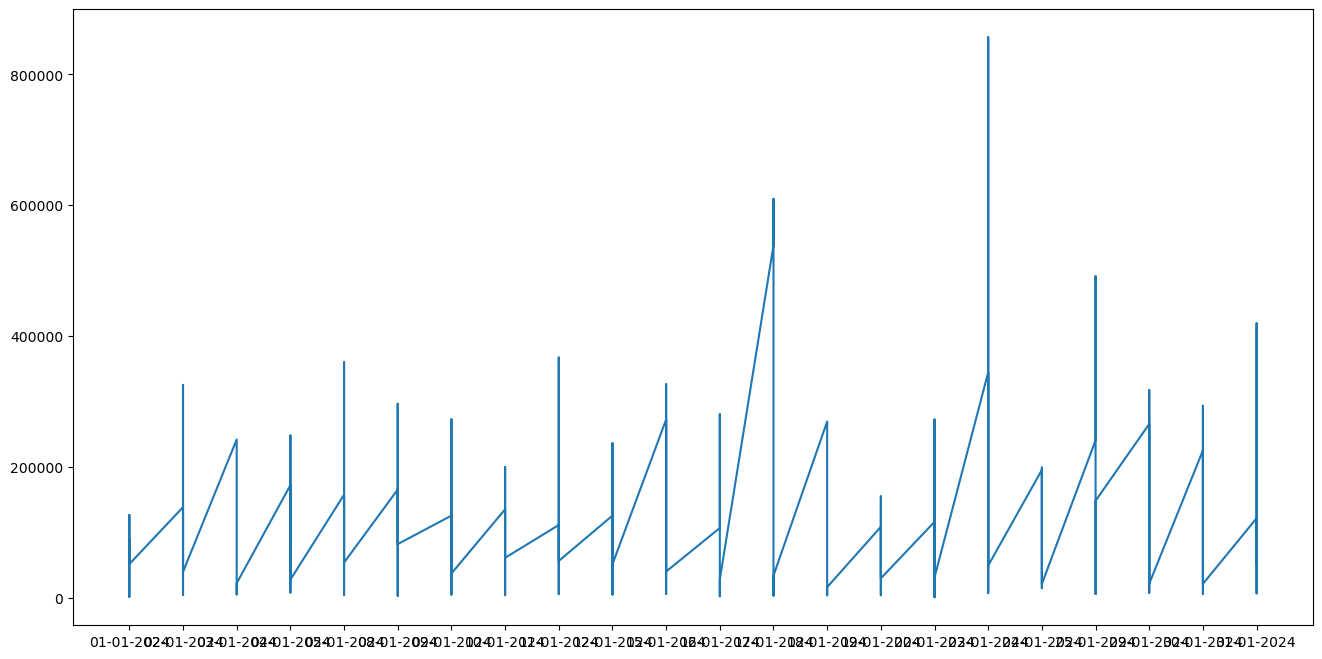

In [42]:
# Data Visualization
plt.figure(figsize=(16,8))
plt.plot(data['Date'], data['Volume'], label="Date-Volume")

In [43]:
# Step 1: Extract date and time from the index
data.index = pd.to_datetime(data.index)
data['Date'] = data.index.date
data['Time'] = data.index.time

In [44]:
data.head()

,Date,Open,High,Low,Close,Volume,Time
1970-01-01 00:00:00.000000000,1970-01-01,642.20,642.70,641.00,641.95,89481,00:00:00
1970-01-01 00:00:00.000000001,1970-01-01,641.95,642.85,641.95,642.45,48965,00:00:00
1970-01-01 00:00:00.000000002,1970-01-01,642.70,644.00,642.70,643.50,65729,00:00:00
1970-01-01 00:00:00.000000003,1970-01-01,643.90,644.55,643.30,643.40,47909,00:00:00
1970-01-01 00:00:00.000000004,1970-01-01,643.70,644.10,643.45,643.75,27645,00:00:00


In [45]:
# Define a function to calculate rank for each time of day
def calculate_rank(group):
    last_5days = group['Date'].unique()[-5:]
    relevant_data = group[group['Date'].isin(last_5days)]
    
    group['Rank'] = group['Volume'].rank(ascending=False)
    
    return group

In [53]:
data = data.groupby('Time').apply(calculate_rank)

C:\Users\asus\AppData\Local\Temp\ipykernel_19996\981897307.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby('Time').apply(calculate_rank)


In [50]:
data

,Date,Open,High,Low,Close,Volume,Time,Rank
1970-01-01 00:00:00.000000000,1970-01-01,642.20,642.70,641.00,641.95,89481,00:00:00,52.0
1970-01-01 00:00:00.000000001,1970-01-01,641.95,642.85,641.95,642.45,48965,00:00:00,205.0
1970-01-01 00:00:00.000000002,1970-01-01,642.70,644.00,642.70,643.50,65729,00:00:00,111.0
1970-01-01 00:00:00.000000003,1970-01-01,643.90,644.55,643.30,643.40,47909,00:00:00,210.0
1970-01-01 00:00:00.000000004,1970-01-01,643.70,644.10,643.45,643.75,27645,00:00:00,430.0
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000008245,1970-01-01,642.90,642.90,642.50,642.80,161605,00:00:00.000008,24.0
1970-01-01 00:00:00.000008246,1970-01-01,642.90,642.95,642.50,642.90,143774,00:00:00.000008,31.0
1970-01-01 00:00:00.000008247,1970-01-01,642.95,643.05,642.45,642.50,166278,00:00:00.000008,23.0
1970-01-01 00:00:00.000008248,1970-01-01,642.50,642.65,641.40,641.70,138018,00:00:00.000008,36.0


In [51]:
sorted_data = data.sort_values(by='Rank', ascending=False)

In [52]:
sorted_data

,Date,Open,High,Low,Close,Volume,Time,Rank
1970-01-01 00:00:00.000000151,1970-01-01,645.00,645.00,644.70,644.70,1379,00:00:00,1000.0
1970-01-01 00:00:00.000006802,1970-01-01,616.40,616.90,616.20,616.90,5838,00:00:00.000006,1000.0
1970-01-01 00:00:00.000001968,1970-01-01,638.90,639.20,638.80,639.20,3034,00:00:00.000001,1000.0
1970-01-01 00:00:00.000002723,1970-01-01,623.30,623.40,623.10,623.10,3986,00:00:00.000002,1000.0
1970-01-01 00:00:00.000004271,1970-01-01,641.10,641.45,641.10,641.30,2350,00:00:00.000004,1000.0
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000002184,1970-01-01,631.05,631.55,629.30,631.45,296569,00:00:00.000002,1.0
1970-01-01 00:00:00.000008197,1970-01-01,639.00,640.70,638.75,640.70,419568,00:00:00.000008,1.0
1970-01-01 00:00:00.000007118,1970-01-01,614.30,614.60,612.45,613.85,491503,00:00:00.000007,1.0
1970-01-01 00:00:00.000003344,1970-01-01,620.65,621.05,620.10,620.10,367306,00:00:00.000003,1.0
